# Installations

In [1]:
!pip install -q albumentations==0.4.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## Import Library from GitHub

In [2]:
!git clone https://github.com/garima-mahato/ERA_V1_API.git

Cloning into 'ERA_V1_API'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 99 (delta 31), reused 86 (delta 18), pack-reused 0
Unpacking objects: 100% (99/99), 48.95 KiB | 1.81 MiB/s, done.


In [3]:
from ERA_V1_API import *

/content/ERA_V1_API/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
%ls

ERA_V1_API/  sample_data/


### Change working directory to where python files are located

In [5]:
import os
default_path = 'ERA_V1_API/'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/ERA_V1_API


In [6]:
# path for saving models, graphs and images
PATH = default_path

# Assignment 10

## Custom Residual Network on CIFAR10
---

1) Used [CustomResidualNet](https://github.com/genigarus/EVA4/blob/master/API/models/CustomResidualNet.py) model from [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

2) Used data loader with augmentations, model loading, train, and test code to train model on Cifar10

3) Best Test Accuracy = 90.08%, Final Test accuracy = 90.08%, number of epochs = 24.

4) Used image augmentation with Cutout

[Link to Google Colab Code File](https://colab.research.google.com/drive/1TLBXgjeO_jYI3x6Z4nrsS6_v7ZjUdtrp)

[Link to API](https://github.com/genigarus/EVA4/tree/master/API)

# Creating and Executing Pipeline for loading data, creating and training model and hyperparameter tuning

In [8]:
# Import
from ERA_V1_API.network_pipeline import *

# Initialize Variables
seed = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
data_path = PATH+'/data'
need_albumentation = True
batch_size = 512
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
inp_size = (3, 32, 32)
path = PATH+"/model"
model_file_name = "custom_residual_network_model"

model_name, criterion, optimizer_name, scheduler_name = "CustomResidualNet", nn.CrossEntropyLoss(), "Adam", "OneCycleLR"
init_lr, init_weight_decay, end_lr, num_epochs, step_mode =  1e-10, 1e-2, 1, 300, "exp"

# Create Network Pipeline
network = NetworkPipeline(data_path, inp_size, seed, means, stdevs, need_albumentation, batch_size, CIFAR10_CLASS_LABELS, model_name, criterion, optimizer_name, scheduler_name)



 Generating train and test loaders.....
Files already downloaded and verified
Files already downloaded and verified


Finding max LR for One Cycle Policy using LR Test Range over 300 epochs...


  0%|          | 0/300 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (min loss 2.092287003403504) to be used: 0.004558929499981067
LR suggestion: steepest gradient
Suggested LR: 3.32E-04


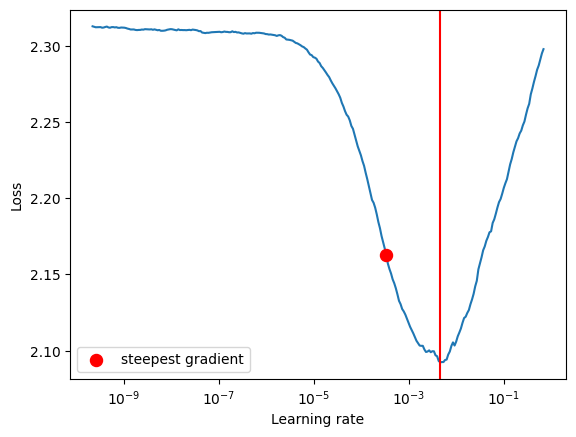

In [9]:

# Use LR Test Range to find maximum LR
best_lr = network.find_network_lr(init_lr, init_weight_decay, end_lr, num_epochs, step_mode=step_mode,range_test=True)


In [10]:
best_lr=3.32E-04

Sample Dataset after transformation


truck  bird  bird  bird  deer


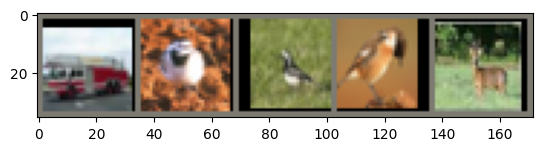

In [11]:
# Display sample data
print("Sample Dataset after transformation")
show_sample_images(network.train_loader, network.labels_list)


In [12]:
import os

if not os.path.isdir('ERA_V1_API/model'):
  os.makedirs('ERA_V1_API/model')
  print('Folder created for saving model.')

Folder created for saving model.


#### Network Training

In [13]:
# Intialize variables for creating and training model
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
DIV_FACTOR = 100

# final_div_factor = div_factor for no annhilation
FINAL_DIV_FACTOR = 100
EPOCHS = 24
MAX_LR_EPOCH = 5
NUM_OF_BATCHES = network.num_of_batches
PCT_START = MAX_LR_EPOCH/EPOCHS

# Based on above found maximum LR, initialize LRMAX and LRMIN
LRMAX = best_lr
LRMIN = LRMAX/DIV_FACTOR

# Initialize optimizer and scheduler parameters
optim_params = {"lr": LRMIN, "weight_decay": WEIGHT_DECAY}
scheduler_params = {"max_lr": LRMAX, "steps_per_epoch": NUM_OF_BATCHES, "epochs": EPOCHS, "pct_start": PCT_START, "anneal_strategy":"linear", "div_factor": DIV_FACTOR, "final_div_factor": FINAL_DIV_FACTOR, "three_phase":False}

# Build model with specified optimizer and scheduler
network.build_network(optim_params, scheduler_params)

# Train model
network.train_network(EPOCHS, is_ocp=True)

# Save model and parameters
network.save_network(path, model_file_name)



Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
    

  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 4139/10000 (41.39%)

EPOCH: 2


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 4235/10000 (42.35%)

EPOCH: 3


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 5574/10000 (55.74%)

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6249/10000 (62.49%)

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6684/10000 (66.84%)

EPOCH: 6


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7300/10000 (73.00%)

EPOCH: 7


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7648/10000 (76.48%)

EPOCH: 8


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8099/10000 (80.99%)

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8082/10000 (80.82%)

EPOCH: 10


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8265/10000 (82.65%)

EPOCH: 11


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8223/10000 (82.23%)

EPOCH: 12


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8307/10000 (83.07%)

EPOCH: 13


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8418/10000 (84.18%)

EPOCH: 14


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8414/10000 (84.14%)

EPOCH: 15


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8650/10000 (86.50%)

EPOCH: 16


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8587/10000 (85.87%)

EPOCH: 17


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8615/10000 (86.15%)

EPOCH: 18


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8714/10000 (87.14%)

EPOCH: 19


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8781/10000 (87.81%)

EPOCH: 20


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8902/10000 (89.02%)

EPOCH: 21


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8946/10000 (89.46%)

EPOCH: 22


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8965/10000 (89.65%)

EPOCH: 23


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9020/10000 (90.20%)

EPOCH: 24


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9031/10000 (90.31%)


 Model training completed...

 Saving trained model and parameters...



 Visualizing:


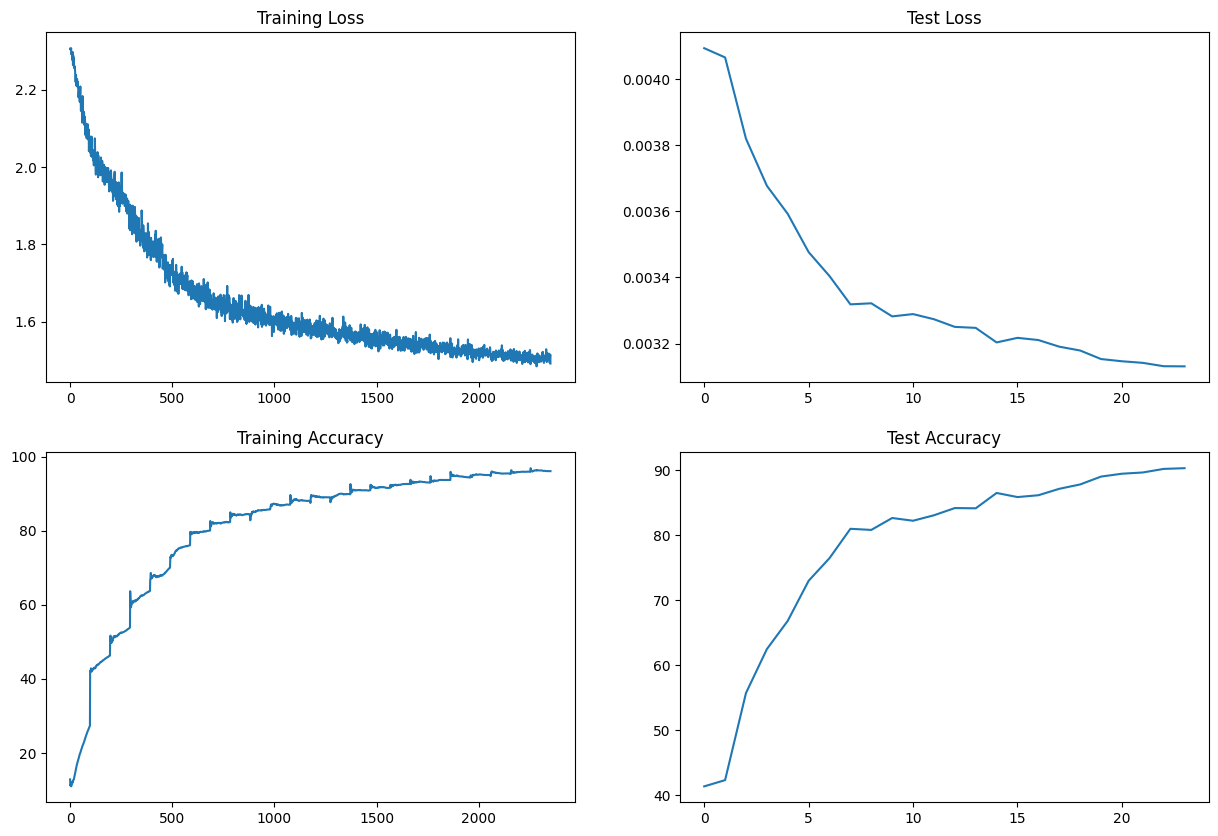

In [14]:
# Visualize training and test accuracy and loss
print("\n Visualizing:")
visualize_graph([tl.detach().cpu() for tl in network.train_losses], network.train_acc , network.test_losses, network.test_acc)

# Visualize Training Vs Test Accuracy of Trained Model

In [15]:
import os

if not os.path.isdir('ERA_V1_API/visualization'):
  os.makedirs('ERA_V1_API/visualization')
  print('Folder create for saving visualizations.')

Folder create for saving visualizations.


In [16]:
%ls ERA_V1_API/

data/  model/  visualization/


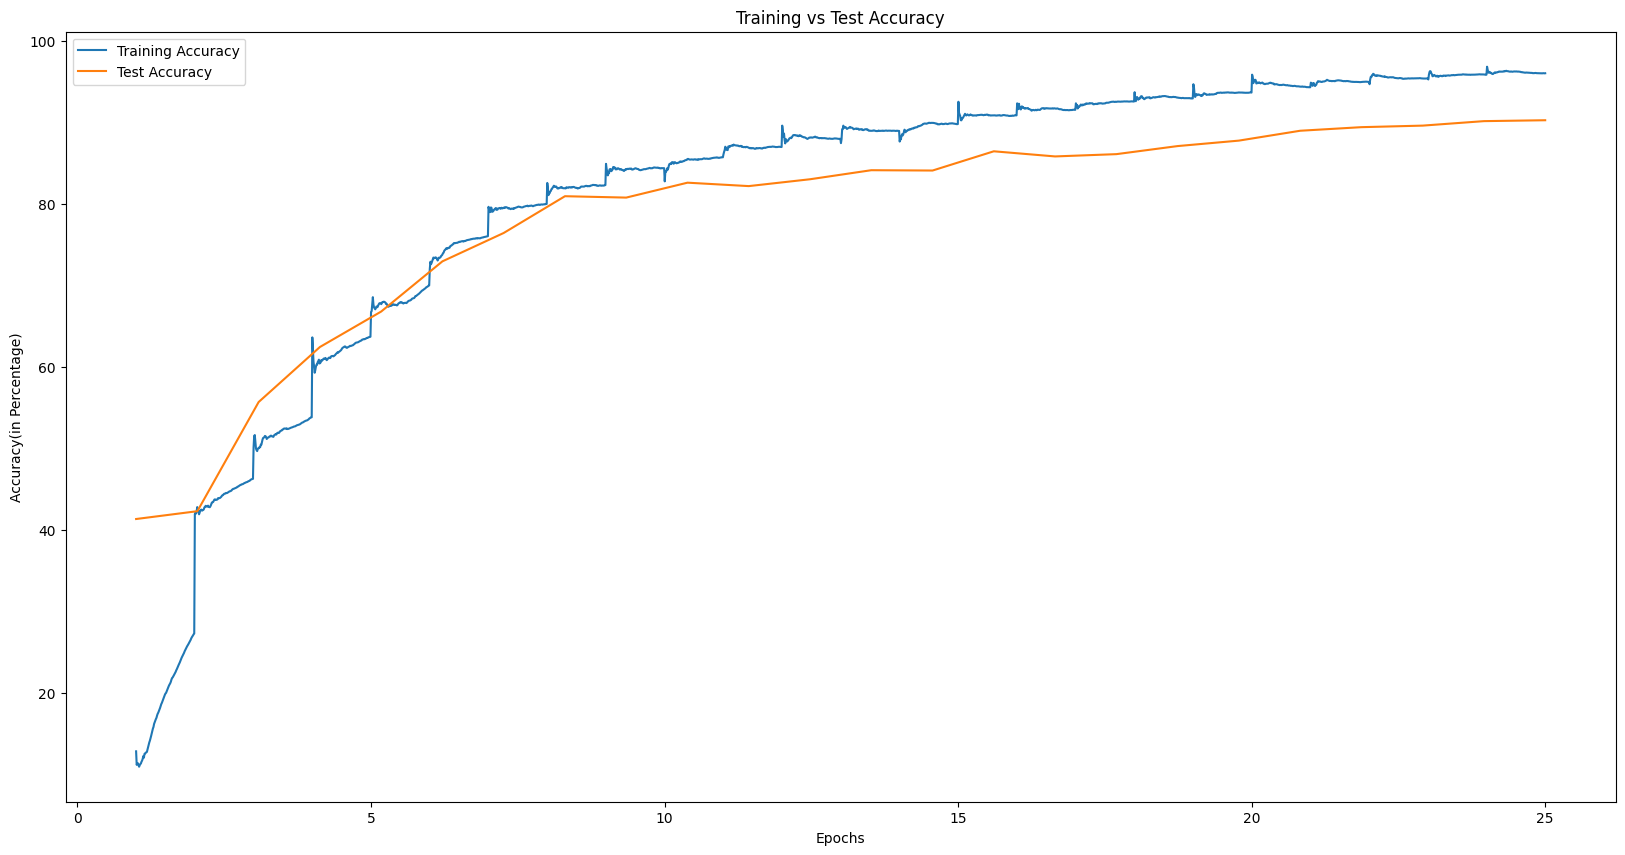

In [17]:
dict_list = {'Training Accuracy': network.train_acc, 'Test Accuracy': network.test_acc}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_comparison_graph"

visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, PATH+"/visualization", name=name)

# View Correctly Classified Images
---

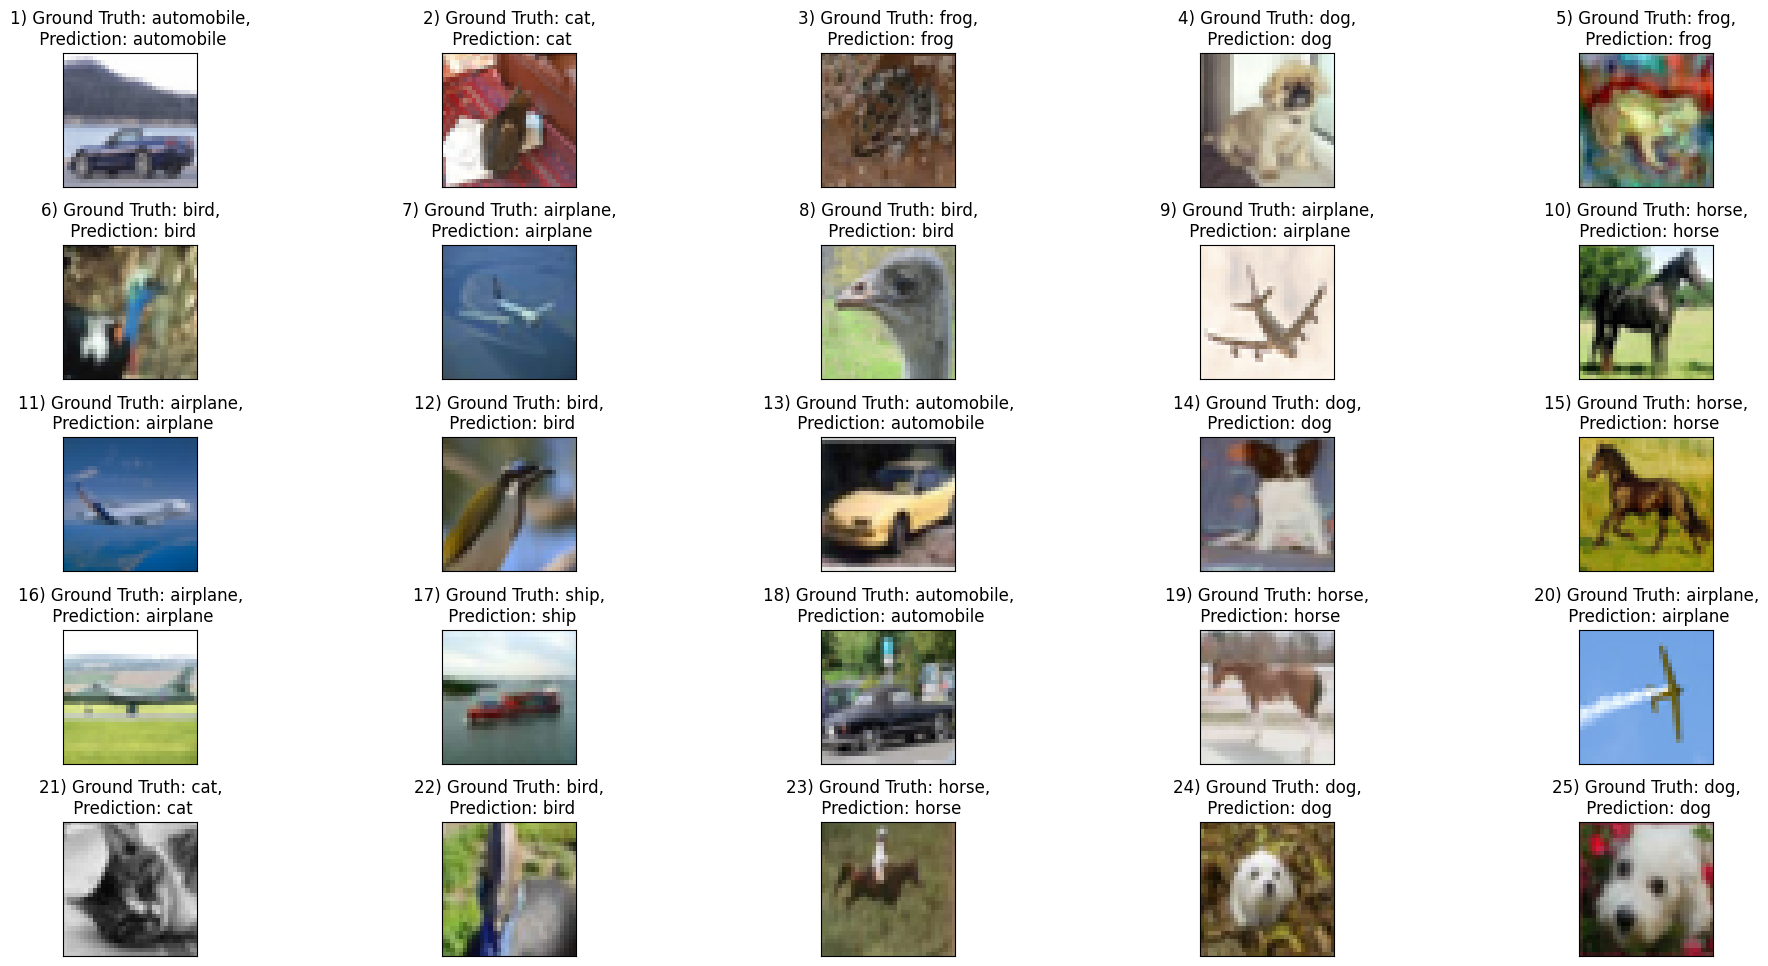

In [18]:
show_save_correctly_classified_images(network.model, network.test_loader, network.device, PATH, name="correctly_classified_imgs", max_correctly_classified_images_imgs=25, labels_list=CIFAR10_CLASS_LABELS)

# View Incorrectly Classified Images
---

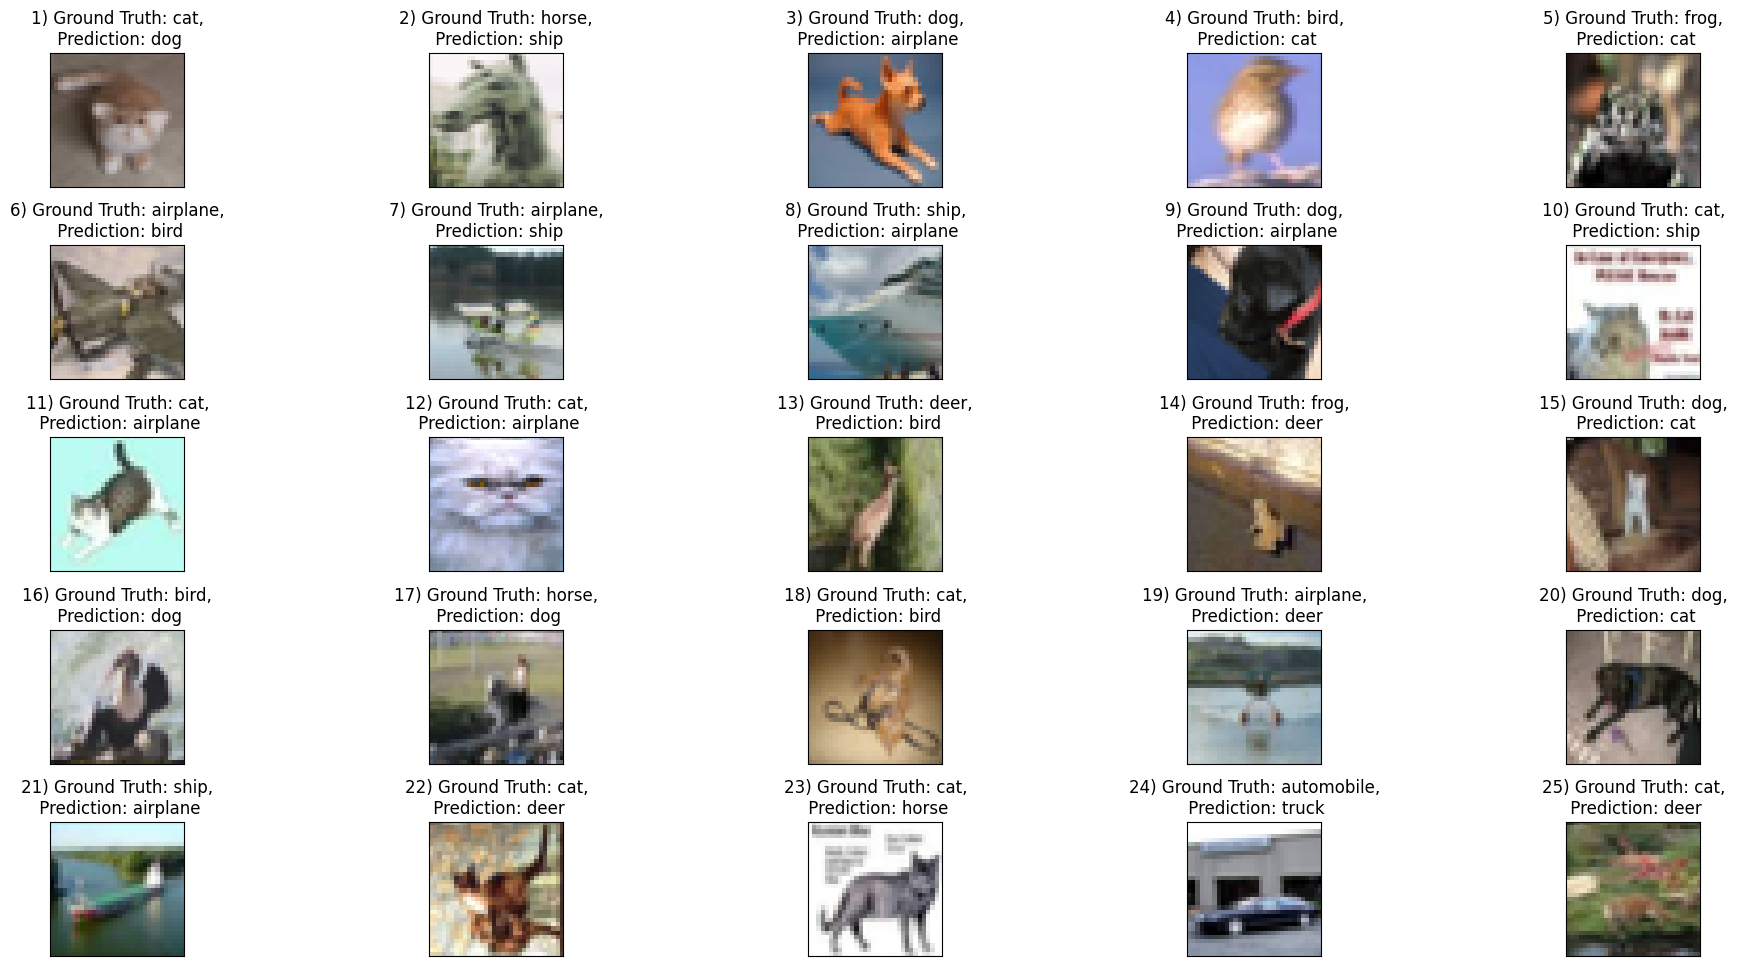

In [19]:
show_save_misclassified_images(network.model, network.test_loader, network.device, PATH, name="misclassified_imgs", max_misclassified_imgs=25, labels_list=CIFAR10_CLASS_LABELS)

# GradCAM Visualization
---

### Fetching correctly and incorrectly classified images

In [20]:
misclassified_imgs, correctly_classified_images = classify_images(network.model, network.test_loader, network.device, 25)

In [21]:
target_layers = ["layer1_x","rb1","layer2","rb2"]
viz_cam = VisualizeCam(network.model, network.labels_list, target_layers)

## For correctly classified images:-

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


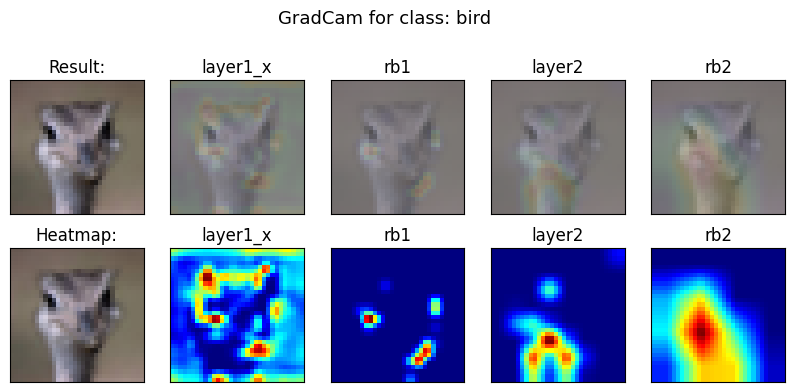

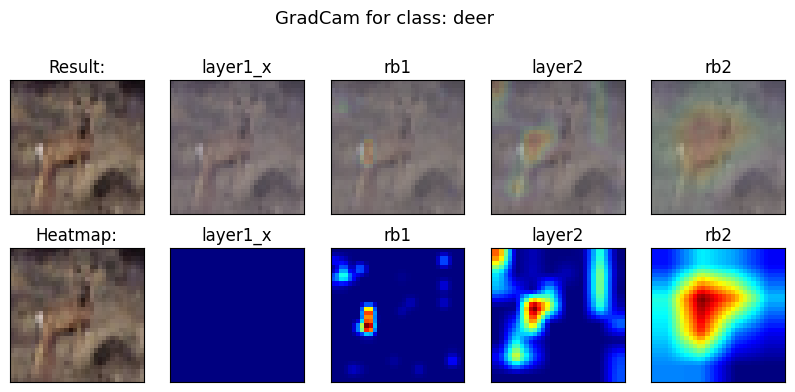

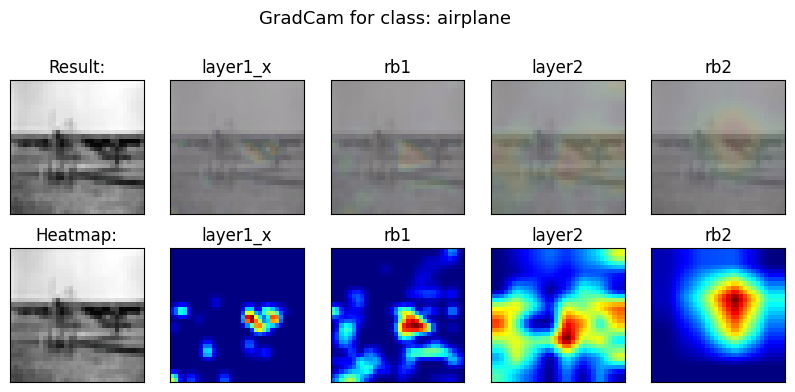

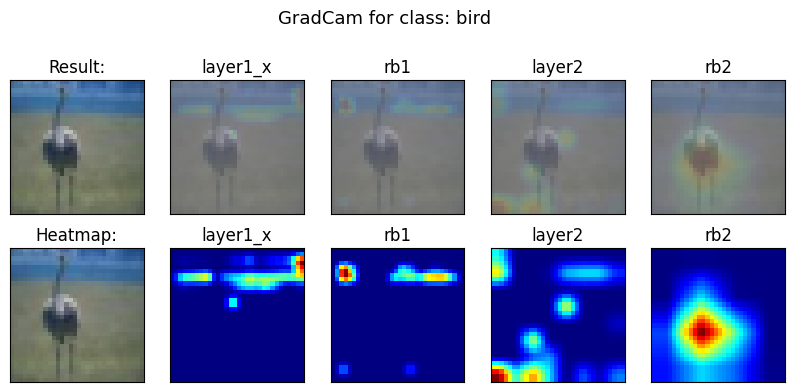

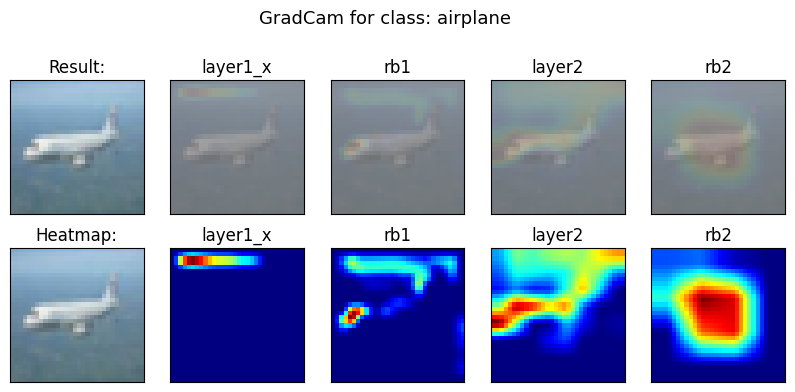

In [22]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, PATH+"/visualization", metric="correct")

## For misclassified images:-

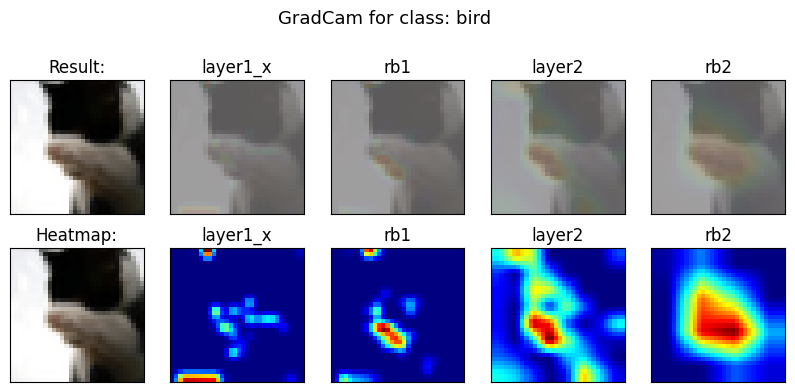

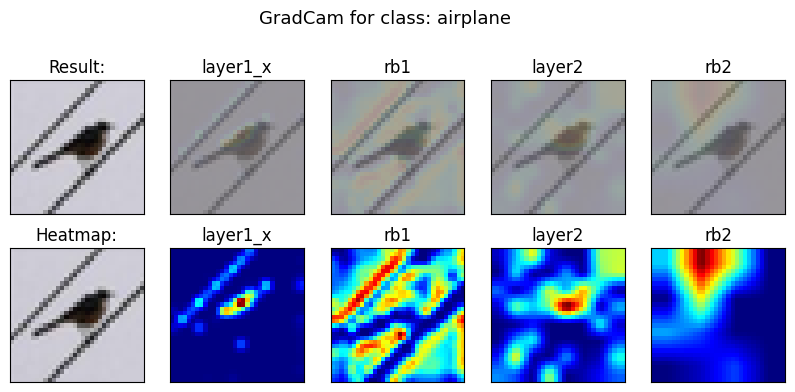

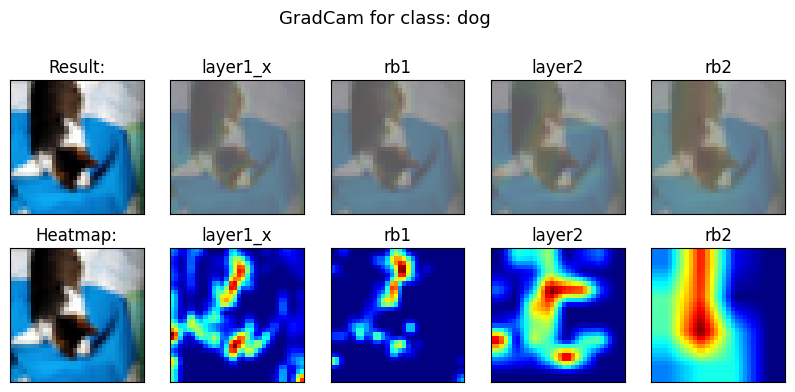

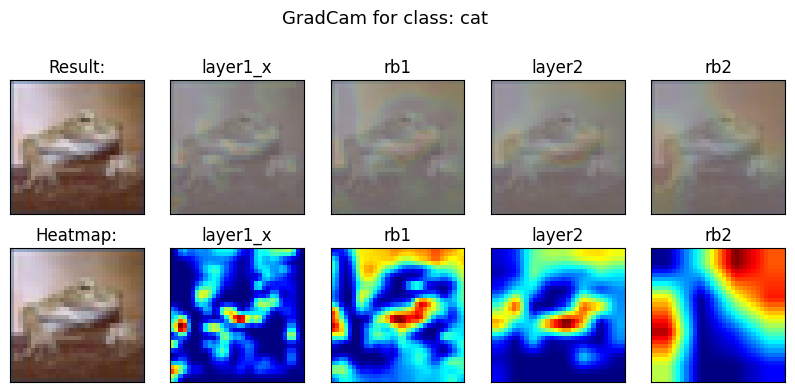

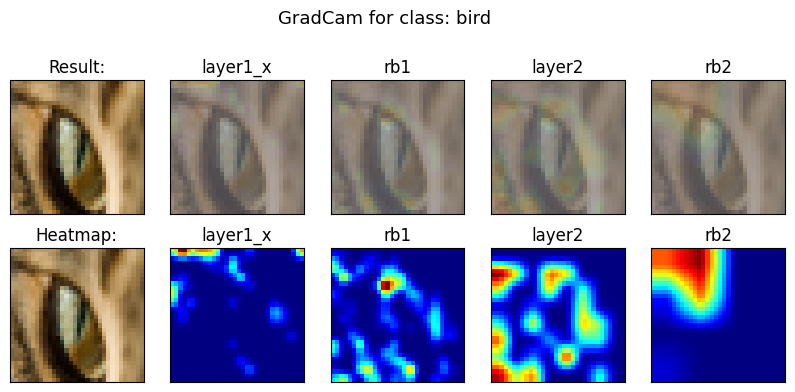

In [23]:
misclassified_pred_images = []
for i in range(len(misclassified_imgs)):
  misclassified_pred_images.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(misclassified_pred_images), target_layers, PATH+"/visualization", metric="incorrect")

# Grad-CAM for 25 misclassified images

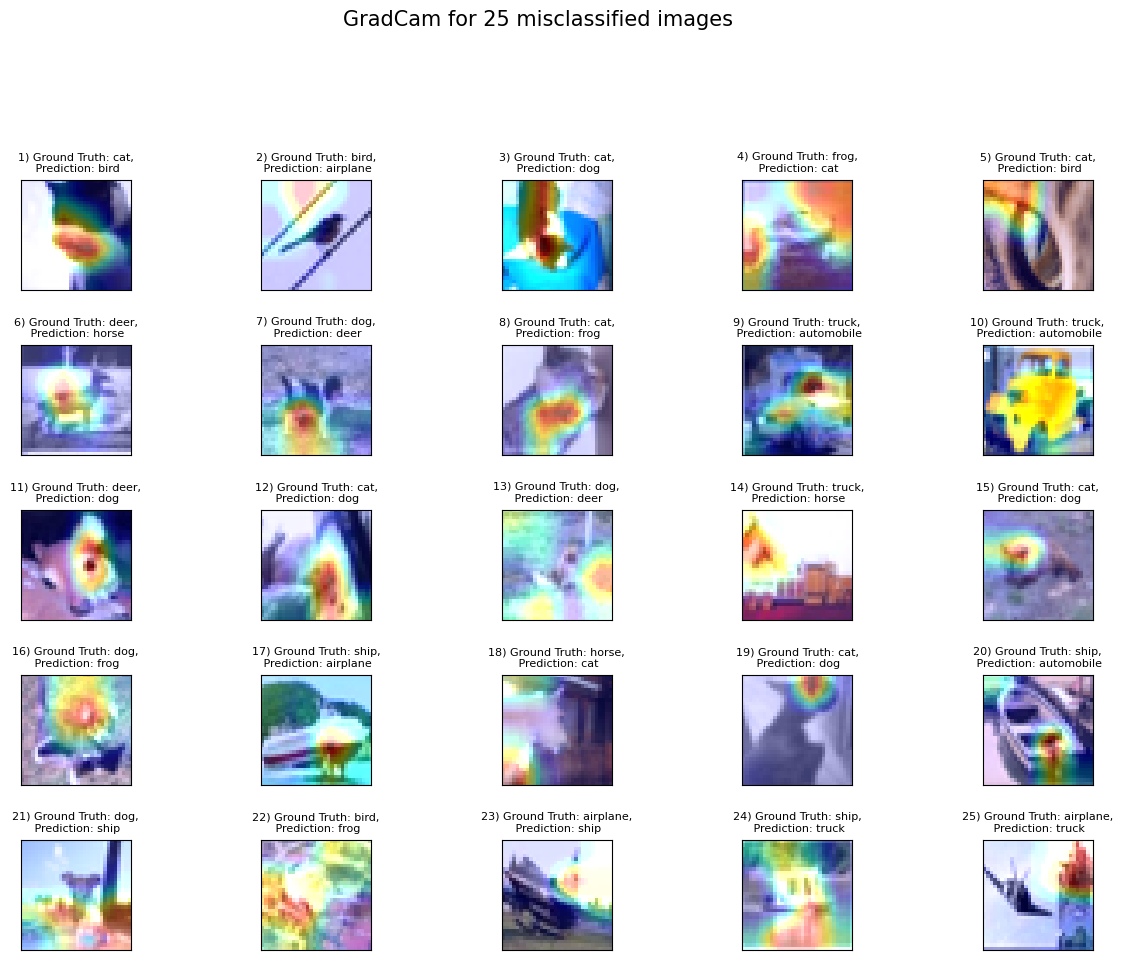

In [24]:
viz_cam.plot_img_heatmap(misclassified_imgs, target_layers, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images")

In [25]:
%pip install -U -q git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

  Preparing metadata (setup.py) ... done


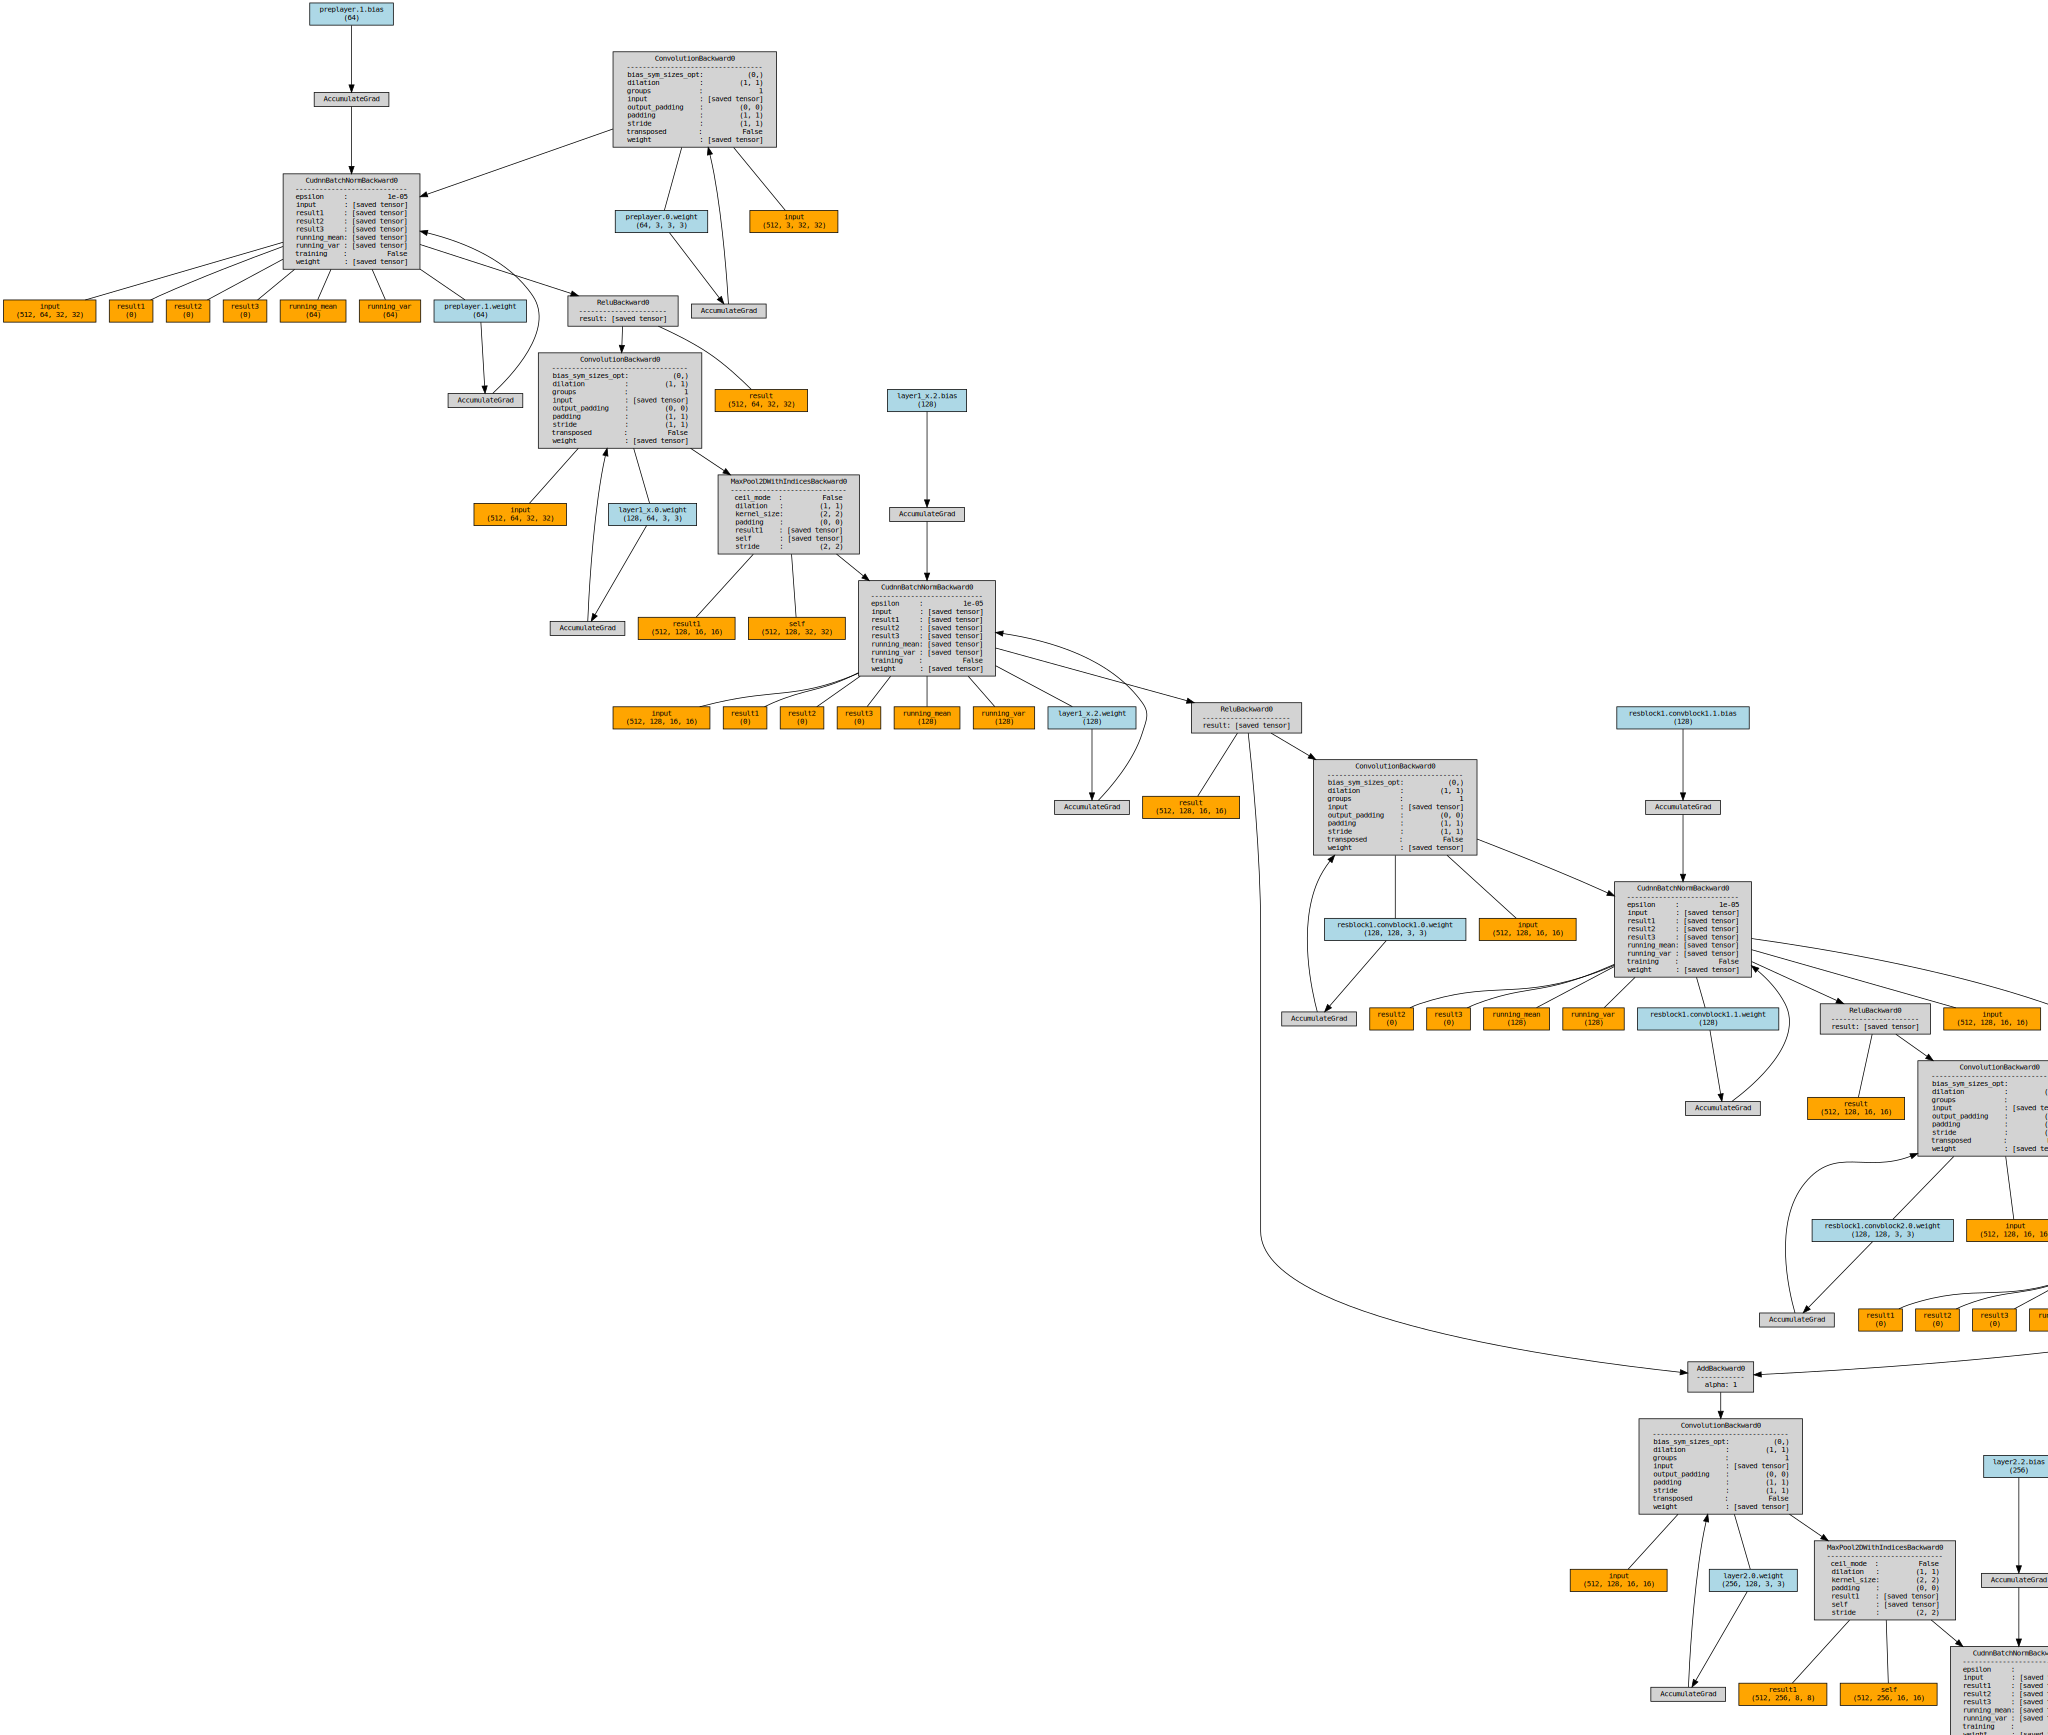

In [26]:
batch_data, batch_label = next(iter(network.train_loader))
batch_data = batch_data.to(network.device)
y = network.model(batch_data)

make_dot(y, params=dict(list(network.model.named_parameters())), show_attrs=True, show_saved=True)

In [27]:
make_dot(y, params=dict(list(network.model.named_parameters())), show_attrs=True, show_saved=True).render("cifar10_s10_custom_resnet_torchviz", format="png")

'cifar10_s10_custom_resnet_torchviz.png'